In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prithwirajmitra/covid-face-mask-detection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/prithwirajmitra/covid-face-mask-detection-dataset/versions/1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet





In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:


!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset



Dataset URL: https://www.kaggle.com/datasets/prithwirajmitra/covid-face-mask-detection-dataset
License(s): copyright-authors
covid-face-mask-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:

!unzip \*.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

# getting insights of data

In [ ]:
for dirpath,dirnames,filenames in os.walk("/content/New Masks Dataset"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in '/content/New Masks Dataset'.
there are 2 directories and 0 images in '/content/New Masks Dataset/Test'.
there are 0 directories and 50 images in '/content/New Masks Dataset/Test/Mask'.
there are 0 directories and 50 images in '/content/New Masks Dataset/Test/Non Mask'.
there are 2 directories and 0 images in '/content/New Masks Dataset/Validation'.
there are 0 directories and 153 images in '/content/New Masks Dataset/Validation/Mask'.
there are 0 directories and 153 images in '/content/New Masks Dataset/Validation/Non Mask'.
there are 2 directories and 0 images in '/content/New Masks Dataset/Train'.
there are 0 directories and 300 images in '/content/New Masks Dataset/Train/Mask'.
there are 0 directories and 300 images in '/content/New Masks Dataset/Train/Non Mask'.


In [ ]:
import matplotlib.image as mpimg
import random
import os
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")

    return img

['269.jpg']
image shape (405, 277, 3)


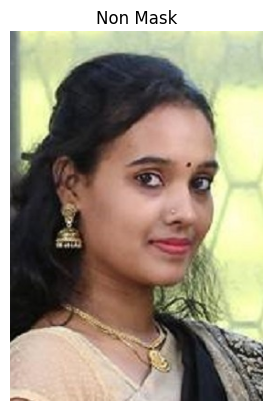

In [ ]:
img = view_image("/content/New Masks Dataset/Train/","Non Mask")

['0954.jpg']
image shape (1332, 1067, 3)


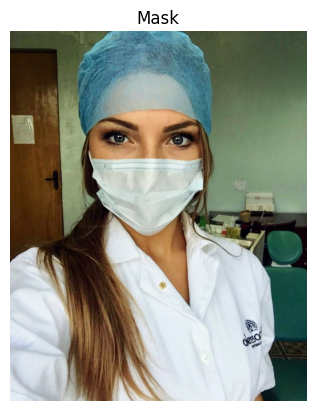

In [ ]:
img = view_image("/content/New Masks Dataset/Train/","Mask")

# Resizing

In [ ]:
data=[]
labels=[]
no_mask=os.listdir("/content/New Masks Dataset/Train/Non Mask/")
for a in no_mask:

    image = cv2.imread("/content/New Masks Dataset/Train/Non Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

no_mask=os.listdir("/content/New Masks Dataset/Test/Non Mask/")
for a in no_mask:

    image = cv2.imread("/content/New Masks Dataset/Test/Non Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [ ]:
mask=os.listdir("/content/New Masks Dataset/Train/Mask/")
for a in mask:

    image = cv2.imread("/content/New Masks Dataset/Train/Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(1)


mask=os.listdir("/content/New Masks Dataset/Test/Mask/")
for a in mask:

    image = cv2.imread("/content/New Masks Dataset/Test/Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(1)

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42,shuffle=True,stratify = labels)


In [ ]:
print("Data Shapes")
print("Train", X_train.shape, y_train.shape)

print("Test", X_test.shape, y_test.shape)

Data Shapes
Train (560, 224, 224, 3) (560,)
Test (140, 224, 224, 3) (140,)


# Grayscale
# equalize (improve grayscale pic pixels )
#  Normalize (pixel 0-1)

In [ ]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
def equalize(img):
    return cv2.equalizeHist(img)

In [ ]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img / 255.0
    return img

# applying preprocessing to the X_train and X_test

In [ ]:
X_train = np.array(list(map(preprocessing, X_train)))

X_test = np.array(list(map(preprocessing, X_test)))

In [ ]:
X_train.shape

(560, 224, 224)

In [ ]:
X_test.shape

(140, 224, 224)

# model

In [ ]:


mymodel = Sequential()
mymodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
mymodel.add(MaxPooling2D((2, 2)))
mymodel.add(Conv2D(64, (3, 3), activation='relu'))
mymodel.add(MaxPooling2D((2, 2)))
mymodel.add(Conv2D(128, (3, 3), activation='relu'))
mymodel.add(MaxPooling2D((2, 2)))
mymodel.add(Flatten())
mymodel.add(Dense(128, activation='relu'))
mymodel.add(Dense(1, activation='sigmoid'))


mymodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

mymodel.fit(X_train, y_train, epochs=10, batch_size=32)


loss, accuracy = mymodel.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 0.5517 - loss: 0.8927
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.8480 - loss: 0.4051
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.8166 - loss: 0.4021
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.8975 - loss: 0.2289
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9115 - loss: 0.2007
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9440 - loss: 0.1993
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.9853 - loss: 0.0612
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9984 - loss: 0.0211
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 64s 4s/step - accuracy: 0.9995 - loss: 0.0190
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.9972 - loss: 0.0104
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 741ms/step - accuracy: 0.8372 - loss: 0.5741
Test accuracy: 0.8214285969734192


# Evaluating

In [ ]:
score = mymodel.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

Test Score: 0.6449841260910034
Test Accuracy: 0.8214285969734192


In [ ]:
predictions = mymodel.predict(X_test)

predict=[]

for i in range(len(predictions)):
    if predictions[i][0]>0.5:
        predict.append(1)
    else:
        predict.append(0)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 755ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predict), columns= ["No Mask", "Mask"], index = ["No Mask", "Mask"])

,No Mask,Mask
No Mask,57,13
Mask,12,58


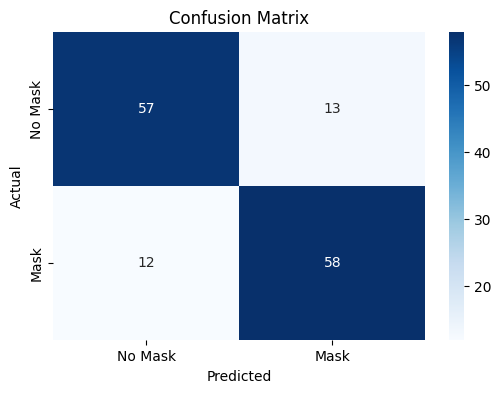

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
cm = confusion_matrix(y_test, predict)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Mask', 'Mask'], yticklabels=['No Mask', 'Mask'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import tensorflow as tf
model_name = "/content/CNN.h5"
tf.keras.models.save_model(mymodel, model_name)

In [ ]:
# prompt: further provide the code that
# take an image as input and
# if the mask is detected then display "person is wearing mask"
# if the mask is not detected then display "person is not wearing mask"

import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("/content/CNN.h5")

def detect_mask(image_path):
  """Detects whether a person in the image is wearing a mask.

  Args:
    image_path: Path to the image file.

  Returns:
    "Person is wearing mask" if mask is detected,
    "Person is not wearing mask" otherwise.
  """
  try:
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    img = np.expand_dims(img, axis=-1)

    prediction = model.predict(img)

    if prediction[0][0] > 0.5:
      return "Person is wearing mask"
    else:
      return "Person is not wearing mask"
  except Exception as e:
    print(f"Error processing image: {e}")
    return "Error processing image"

# Example usage:
image_path = "/content/ali.jpeg"  # image with no mask
#image_path = '/content/ali_mask.jpeg' # with mask
result = detect_mask(image_path)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


'Person is not wearing mask'